In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Cargo el grid de 20x20 km que hemos construido encima de la Comunidad Valenciana

In [2]:
grid = pd.read_csv("../Data/Processed/grid_20x20.csv", delimiter=";")

In [3]:
grid.head()

,id,left,top,right,bottom,row_index,col_index,name2
0,1,"626576,3888","4519161,349","646576,3888","4499161,349",0,0,A0
1,0,"626576,3888","4499161,349","646576,3888","4479161,349",1,0,B0
2,3,"626576,3888","4479161,349","646576,3888","4459161,349",2,0,C0
3,4,"626576,3888","4459161,349","646576,3888","4439161,349",3,0,D0
4,5,"626576,3888","4439161,349","646576,3888","4419161,349",4,0,E0


Sustituyo las comas por puntos en las columnas que delimitan los coordenadas de cada cuadrícula y paso esas columnas a float

In [4]:
columns_to_convert = ['left', 'top', 'right', 'bottom']
for col in columns_to_convert:
    grid[col] = grid[col].str.replace(',', '.').astype(float)

Cargo el dataframe resultante del mapeo de coordenadas faltantes del notebook anterior.

In [5]:
df_incendios_actualizado = pd.read_csv("../Data/Processed/df_incendios_actualizado.csv")

In [6]:
df_incendios_actualizado= df_incendios_actualizado[df_incendios_actualizado['X'] >= 600000]
df_incendios_actualizado= df_incendios_actualizado[df_incendios_actualizado['Y'] >= 4170000]
df_incendios_actualizado= df_incendios_actualizado[df_incendios_actualizado['Y'] <= 4540000]

Hago una representación del grid y los incendios

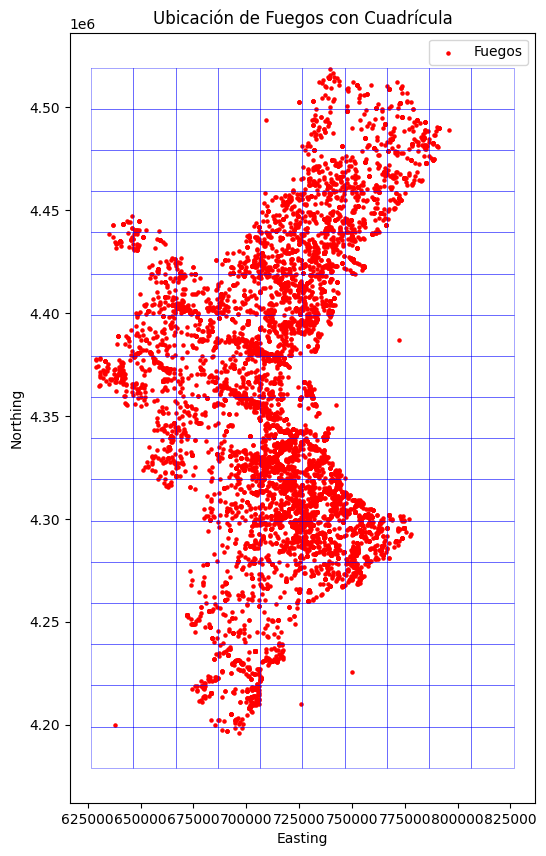

In [7]:
# Crear un scatter plot de puntos
plt.figure(figsize=(6, 10))
plt.scatter(df_incendios_actualizado['X'], df_incendios_actualizado['Y'], color='red', marker='o', label='Fuegos', s=5)

# Dibujar los rectángulos de la cuadrícula usando el DataFrame 'grid'
for _, row in grid.iterrows():
    plt.plot(
        [row['left'], row['right'], row['right'], row['left'], row['left']],
        [row['top'], row['top'], row['bottom'], row['bottom'], row['top']],
        color='blue', alpha=0.5, linewidth=0.5
    )

# Configuración del gráfico
plt.title("Ubicación de Fuegos con Cuadrícula")
plt.xlabel("Easting")
plt.ylabel("Northing")
plt.legend()
plt.show()


In [8]:
df_incendios_actualizado[["X", "Y"]].head()

,X,Y
0,717985.0000,4410167.000
1,733557.3760,4303539.156
2,682259.0000,4389508.000
3,765471.2007,4491735.439
4,747464.2121,4498228.632


Agrego la columna con la cuadrícula del grid en que está localizado el incendio

In [9]:
# Función para asignar la cuadrícula a cada incendio
def assign_grid_name(x, y, grid_df):
    match = grid_df[
        (grid_df['left'] <= x) & (grid_df['right'] >= x) &
        (grid_df['bottom'] <= y) & (grid_df['top'] >= y)
    ]
    if not match.empty:
        return match.iloc[0]['name2']
    return None

# Aplicar la función a cada fila del dataframe de incendios
df_incendios_actualizado["grid_name"] = df_incendios_actualizado.apply(
    lambda row: assign_grid_name(row["X"], row["Y"], grid), axis=1
)

# Guardar el dataset actualizado si es necesario
df_incendios_actualizado.to_csv("../Data/Processed/df_con_grid.csv", index=False)